# Team:
- Balam Euan Cesar Arturo
- De Gante Pérez Diego
- Garcia Martinez Rodrigo
- Polanco González Roselyn
- Ramirez Rubio Mauricio

# Multivariate Linear Regression

In this assignment, you will implement multivariate linear regression to predict the price of houses based on its characteristics.

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file houses.csv contains a training set of housing prices in the city of Valladolid. The first column is the size of the house (in square feet), the second column is the number of bedrooms and the third column is the price of the house. Dataset is like below:

| Size of the house (in square feet) | Number of bedrooms | Price of the house |
|------------------------------------|--------------------|--------------------|
| 2104                               | 3                  | 399900             |
| 1600                               | 3                  | 329900             |
| 2400                               | 3                  | 369000             |


You should fit a multivariate linear regression model using size and bedrooms as variables to predict the price:
* Plot scatterplot of the two variables against price
* Use Scikit-learn to fit the model
* Compute the parameters with the normal equations using np.linalg.inv()
* Compute the parameters with the pseudo-inverse using np.linalg.pinv()
* Plot the fitted surface obtained with any of the previous methods

After that, you should implement the gradient descent algorithm to train a multivariate linear regression model. Try to fit the model with gradient descent and describe the results.

Note that you should standardize the values of the input variables, substracting the mean and dividing by the standard deviation.

For batch gradient descent you should consider the following:

* Define a variable for the learning rate $\alpha$ and try with a default value of 0.01.
* Define a maximum number of iterations with 5000 as default.
* Initialize $\boldsymbol{\theta}$ with random values or zeros.
* Plot J as a function of time (iterations).

Finally, you should implement stochastic and mini-batch gradient descent and compare the parameters obtained with all methods.
- Scikit-learn
- Normal equations
- Pseudo-inverse
- Gradient descent (batch)
- Gradient descent (stochastic)
- Gradient descent (mini-batch)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Suprimir notación científica en arrays de NumPy para mejor legibilidad
np.set_printoptions(suppress=True)

In [8]:
# Cargar el dataset de "houses.csv"; se asignan nombres de columna manualmente
# porque el CSV no tiene encabezado
houses = pd.read_csv("houses.csv", names=["size", "rooms", "price"])
houses.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
# Separar los features X y la variable objetivo y
# X contiene 'size' y 'rooms'; Y contiene 'price'
X_data = np.array(houses[['size', 'rooms']])        # Matriz de features (n_samples x 2)
y_data = np.array(houses['price']).reshape(-1, 1)   # Vector columna de precios (n_samples x 1) donde reshape cambia la dimensión a una matriz de una sola columna sin modificar los datos
X_data.shape, y_data.shape                          # Verificar las dimensiones de X_data y y_data

((47, 2), (47, 1))

### Raw data (without normalization)

In [10]:
# ====== Datos SIN normalizar (para sklearn, Normal Eq, SVD) ======
# Guardamos X_raw antes de aplicar StandardScaler
X_raw = np.c_[np.ones(X_data.shape[0]), X_data]  # [1, size, rooms] - datos crudos
X_raw

array([[   1., 2104.,    3.],
       [   1., 1600.,    3.],
       [   1., 2400.,    3.],
       [   1., 1416.,    2.],
       [   1., 3000.,    4.],
       [   1., 1985.,    4.],
       [   1., 1534.,    3.],
       [   1., 1427.,    3.],
       [   1., 1380.,    3.],
       [   1., 1494.,    3.],
       [   1., 1940.,    4.],
       [   1., 2000.,    3.],
       [   1., 1890.,    3.],
       [   1., 4478.,    5.],
       [   1., 1268.,    3.],
       [   1., 2300.,    4.],
       [   1., 1320.,    2.],
       [   1., 1236.,    3.],
       [   1., 2609.,    4.],
       [   1., 3031.,    4.],
       [   1., 1767.,    3.],
       [   1., 1888.,    2.],
       [   1., 1604.,    3.],
       [   1., 1962.,    4.],
       [   1., 3890.,    3.],
       [   1., 1100.,    3.],
       [   1., 1458.,    3.],
       [   1., 2526.,    3.],
       [   1., 2200.,    3.],
       [   1., 2637.,    3.],
       [   1., 1839.,    2.],
       [   1., 1000.,    1.],
       [   1., 2040.,    4.],
       [  

### Standardize data

Sometimes can be useful to standardize the input variables to help with convergence in gradient descent. Note that this may not be necessary for sklearn, normal equations and SVD, but done here just to compare results with gradient descent method.

In [11]:
# Instanciar el escalador y ajustar-transformar las features
# StandardScaler: z = (x - mean) / std
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)  # Ahora X_data tiene media≈0 y std≈1 por columna
X_data

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517],
       [-0.01994505,  1.10220517],
       [-0.59358852, -0.22609337],
       [-0.72968575, -0.22609337],
       [-0.78946678, -0.22609337],
       [-0.64446599, -0.22609337],
       [-0.0771822 ,  1.10220517],
       [-0.000866  , -0.22609337],
       [-0.14077904, -0.22609337],
       [ 3.15099326,  2.4305037 ],
       [-0.9319237 , -0.22609337],
       [ 0.38071502,  1.10220517],
       [-0.86578299, -1.5543919 ],
       [-0.97262567, -0.22609337],
       [ 0.77374348,  1.10220517],
       [ 1.31050078,  1.10220517],
       [-0.29722726, -0.22609337],
       [-0.14332291, -1.5543919 ],
       [-0.50455295, -0.22609337],
       [-0.0491996 ,  1.10220517],
       [ 2.40309445, -0.22609337],
       [-1.14560907, -0.22609337],
       [-0.69025572, -0.22609337],
       [ 0.66817273, -0.22609337],
       [ 0.25352135,

### Include $x_0$ for the bias term.
We want to include the *bias* term in the model, so we include an additional column (variable $x_0$) full of ones.

In [12]:
# Concatenar columna de unos al inicio de la matriz de features
# X resultante tiene forma (n_samples x 3): [1, size_std, rooms_std]
X = np.c_[np.ones(X_data.shape[0]), X_data]
X

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517],
       [ 1.        , -0.01994505,  1.10220517],
       [ 1.        , -0.59358852, -0.22609337],
       [ 1.        , -0.72968575, -0.22609337],
       [ 1.        , -0.78946678, -0.22609337],
       [ 1.        , -0.64446599, -0.22609337],
       [ 1.        , -0.0771822 ,  1.10220517],
       [ 1.        , -0.000866  , -0.22609337],
       [ 1.        , -0.14077904, -0.22609337],
       [ 1.        ,  3.15099326,  2.4305037 ],
       [ 1.        , -0.9319237 , -0.22609337],
       [ 1.        ,  0.38071502,  1.10220517],
       [ 1.        , -0.86578299, -1.5543919 ],
       [ 1.        , -0.97262567, -0.22609337],
       [ 1.        ,  0.77374348,  1.10220517],
       [ 1.        ,  1.31050078,  1.10220517],
       [ 1.        , -0.29722726, -0.226

Here we also transform the target variable $y$ to thousand of dollars. This is also not required, but done here for convenience.

In [ ]:
# Convertir precios a miles de dólares para trabajar con números más manejables
# Esto no afecta el modelo, solo facilita la interpretación de theta
# Note: GD MSE is in (thousands of $)², analytical MSE is in ($)²
y = y_data / 1000
y

array([[399.9  ],
       [329.9  ],
       [369.   ],
       [232.   ],
       [539.9  ],
       [299.9  ],
       [314.9  ],
       [198.999],
       [212.   ],
       [242.5  ],
       [239.999],
       [347.   ],
       [329.999],
       [699.9  ],
       [259.9  ],
       [449.9  ],
       [299.9  ],
       [199.9  ],
       [499.998],
       [599.   ],
       [252.9  ],
       [255.   ],
       [242.9  ],
       [259.9  ],
       [573.9  ],
       [249.9  ],
       [464.5  ],
       [469.   ],
       [475.   ],
       [299.9  ],
       [349.9  ],
       [169.9  ],
       [314.9  ],
       [579.9  ],
       [285.9  ],
       [249.9  ],
       [229.9  ],
       [345.   ],
       [549.   ],
       [287.   ],
       [368.5  ],
       [329.9  ],
       [314.   ],
       [299.   ],
       [179.9  ],
       [299.9  ],
       [239.5  ]])

### Plot the data

Now that we have our data prepared, let's plot the independent variables (features) along with the dependent variable (target).

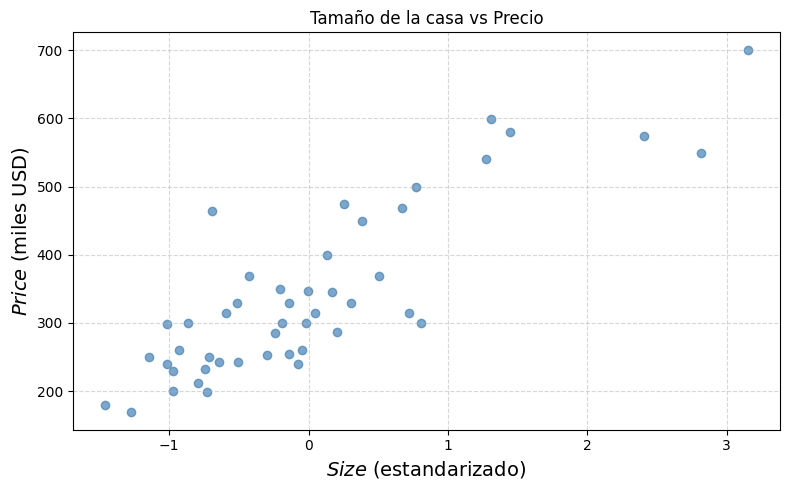

In [14]:
# Crear figura
plt.figure(figsize=(8, 5))

# Scatter plot de size (estandarizado) vs precio
plt.scatter(X[:, 1], y, color='steelblue', alpha=0.7)

# Etiquetas y título
plt.xlabel("$Size$ (estandarizado)", fontsize=14)
plt.ylabel("$Price$ (miles USD)", fontsize=14)
plt.title("Tamaño de la casa vs Precio")

# Cuadrícula, ajuste de márgenes y mostrar
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

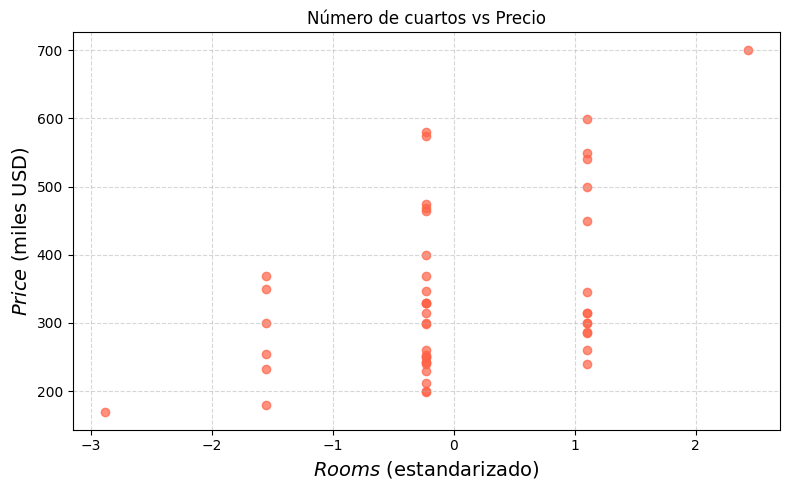

In [15]:
# Crear figura
plt.figure(figsize=(8, 5))

# Scatter plot de rooms (estandarizado) vs precio
plt.scatter(X[:, 2], y, color='tomato', alpha=0.7)

# Etiquetas y título
plt.xlabel("$Rooms$ (estandarizado)", fontsize=14)
plt.ylabel("$Price$ (miles USD)", fontsize=14)
plt.title("Número de cuartos vs Precio")

# Cuadrícula, ajuste de márgenes y mostrar
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

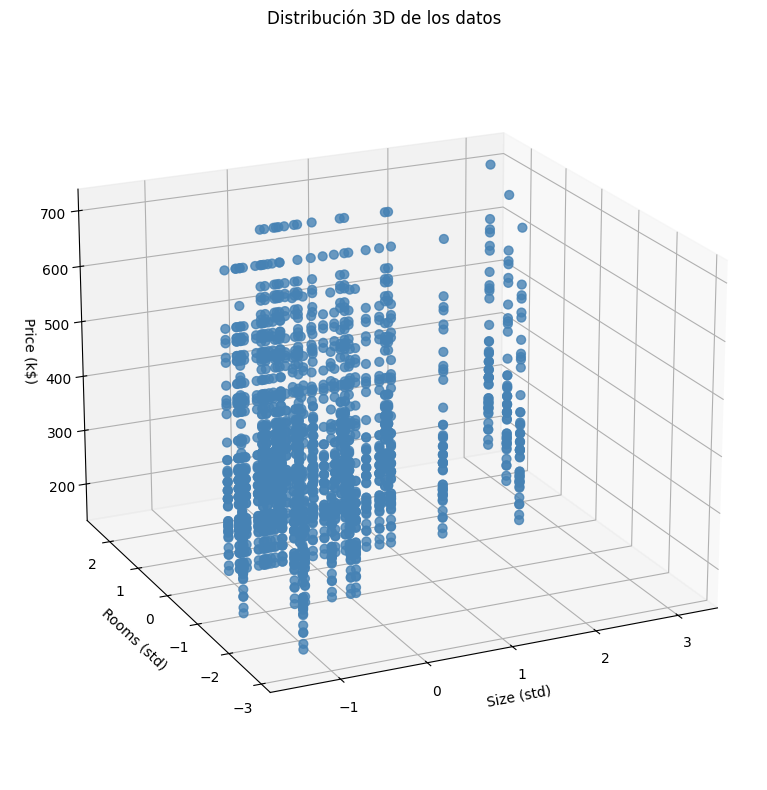

In [16]:
# Crear figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D: size (eje X), rooms (eje Y), precio (eje Z)
ax.scatter(X[:, 1], X[:, 2], y, c='steelblue', s=40, alpha=0.8)

# Etiquetas de cada eje y título
ax.set_xlabel('Size (std)')
ax.set_ylabel('Rooms (std)')
ax.set_zlabel('Price (k$)')
ax.set_title('Distribución 3D de los datos')

# Ángulo de cámara: elevación=20°, azimut=245°
ax.view_init(20, 245)

# Ajuste de márgenes y mostrar
plt.tight_layout()
plt.show()

### 1. Scikit-learn

In [44]:
# Instanciar y ajustar el modelo de regresión lineal de sklearn
# fit_intercept=False: el intercepto ya está incluido en la columna de unos de X
lr = LinearRegression(fit_intercept=False)
lr.fit(X_raw, y_data)  # Ajustar el modelo: X (n x 3), y (n x 1)

# Extraer los coeficientes theta encontrados por sklearn
theta_sklearn = lr.coef_.T  # Transponer para obtener un vector columna (3 x 1) en lugar de (1 x 3)
print("Parámetros (sklearn):")
print(f"  θ₀ (bias):  {theta_sklearn[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_sklearn[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_sklearn[2][0]:.4f}")

Parámetros (sklearn):
  θ₀ (bias):  89597.9095
  θ₁ (size):  139.2107
  θ₂ (rooms): -8738.0191


$\hat{y} = 340.4127 + 109.4478 x_1 - 6.5784 x_2$

In [45]:
lr.predict(X_raw)

array([[356283.1103389 ],
       [286120.93063401],
       [397489.46984812],
       [269244.1857271 ],
       [472277.85514636],
       [330979.02101847],
       [276933.02614885],
       [262037.48402897],
       [255494.58235014],
       [271364.59918815],
       [324714.54068768],
       [341805.20024107],
       [326492.02609913],
       [669293.21223209],
       [239902.98686016],
       [374830.38333402],
       [255879.96102141],
       [235448.2452916 ],
       [417846.48160547],
       [476593.38604091],
       [309369.11319496],
       [334951.62386342],
       [286677.77333009],
       [327777.17551607],
       [604913.37413438],
       [216515.5936252 ],
       [266353.01492351],
       [415030.01477434],
       [369647.33504459],
       [430482.39959029],
       [328130.30083656],
       [220070.5644481 ],
       [338635.60808944],
       [500087.73659911],
       [306756.36373941],
       [263429.59076914],
       [235865.87731365],
       [351442.99009906],
       [6414

### Plot the data

In [46]:
theta_hat = lr.coef_.T
theta_hat

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [47]:
size_points, rooms_points = np.meshgrid([np.min(X_raw[:,1]), np.max(X_raw[:,1])],[np.min(X_raw[:,2]), np.max(X_raw[:,2])])
size_points, rooms_points

(array([[ 852., 4478.],
        [ 852., 4478.]]),
 array([[1., 1.],
        [5., 5.]]))

In [48]:
# Calcular los valores del plano: ŷ = θ₀ + θ₁·size + θ₂·rooms
price_points = theta_hat[0] + theta_hat[1] * size_points + theta_hat[2] * rooms_points

Text(0.5, 0.92, 'Plano de regresión')

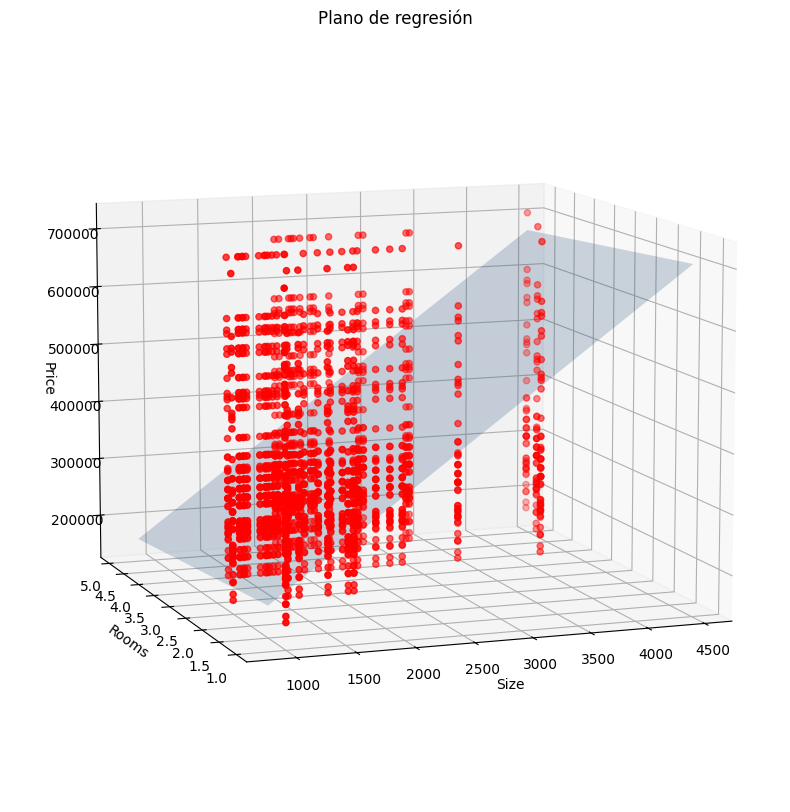

In [49]:
# Graficar datos reales (puntos rojos) + plano ajustado (superficie azul)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw[:,1], X_raw[:,2], y_data, c='r')
ax.set_xlabel('Size')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.plot_surface(size_points, rooms_points, price_points, alpha=0.2, color='dodgerblue')
ax.view_init(10, 250)
ax.set_title('Plano de regresión')

In [50]:
import plotly.express as px
import plotly.graph_objects as go

fig_layout = go.Layout(title='Fitted model', autosize=True, width=800, height=800,
                       scene = dict(xaxis=dict(title='Size'),
                                    yaxis=dict(title='Rooms'),
                                    zaxis=dict(title='Price')))

fig = px.scatter_3d(x=X_raw[:,1].ravel(), y=X_raw[:,2].ravel(), z=y_data.ravel())
fig.update_traces(marker=dict(size=3))
fig.update_layout(fig_layout)
fig.add_traces(go.Surface(x=size_points, y=rooms_points, z=price_points, opacity=0.2))

fig.show()

### 2. Normal equation

Parámetros (Ecuación Normal):
  θ₀ (bias):  89597.9095
  θ₁ (size):  139.2107
  θ₂ (rooms): -8738.0191
MSE (Ecuación Normal): 4086560101.2057


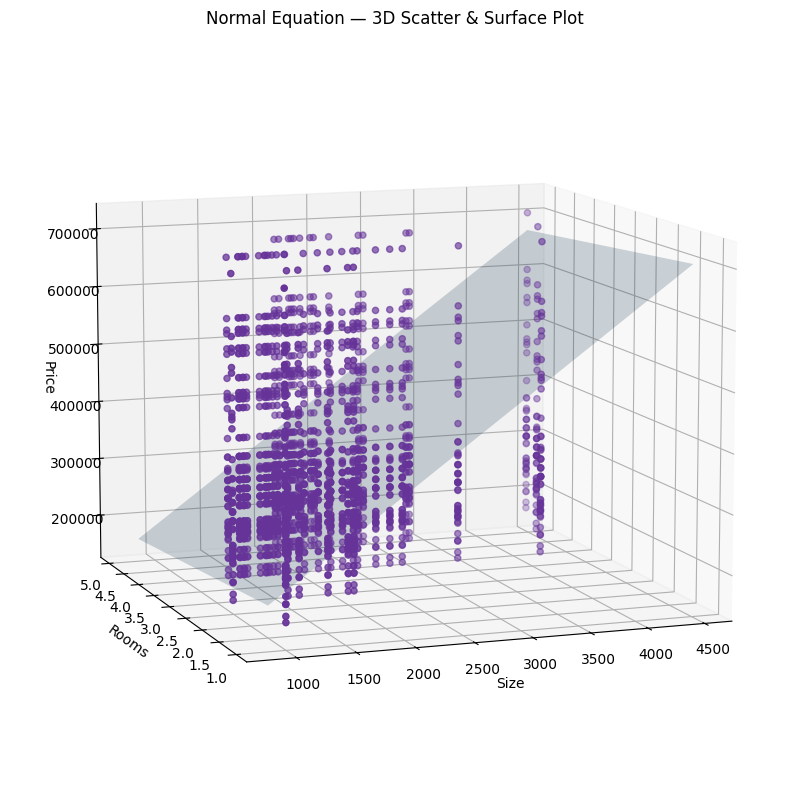

In [52]:
"""
Normal Equation finds the exact solution in one step using linear algebra.
No iterations needed — it directly minimizes the cost function analytically.
"""

# Ecuación normal: θ = (XᵀX)⁻¹ Xᵀy
theta = np.linalg.inv(X_raw.T.dot(X_raw)).dot(X_raw.T).dot(y_data)  # Solución exacta de mínimos cuadrados

# Imprimir parámetros y MSE
print("Parámetros (Ecuación Normal):")
print(f"  θ₀ (bias):  {theta[0][0]:.4f}")
print(f"  θ₁ (size):  {theta[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta[2][0]:.4f}")
print(f"MSE (Ecuación Normal): {mean_squared_error(y_data, X_raw @ theta):.4f}")

# Crear malla de puntos min/max para graficar el plano
size_points, rooms_points = np.meshgrid(
    [np.min(X_raw[:,1]), np.max(X_raw[:,1])],  # Rango de size
    [np.min(X_raw[:,2]), np.max(X_raw[:,2])]   # Rango de rooms
)

# Calcular altura del plano: ŷ = θ₀ + θ₁·size + θ₂·rooms
price_points = theta[0] + theta[1] * size_points + theta[2] * rooms_points

# Graficar datos reales + plano ajustado
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw[:,1], X_raw[:,2], y_data, c='rebeccapurple')   # Puntos reales
ax.set_xlabel('Size')
ax.set_ylabel('Rooms')
ax.set_zlabel('Price')
ax.plot_surface(size_points, rooms_points, price_points, alpha=0.2)  # Plano ajustado
ax.set_title("Normal Equation — 3D Scatter & Surface Plot")
ax.view_init(10, 250)                  # Ángulo de cámara
plt.show()

### 3. SVD pseudoinverse

In [53]:
"""
SVD Pseudoinverse decomposes X into U, Σ, Vᵀ and manually builds the pseudoinverse.
More transparent than np.linalg.pinv() — shows each step of the decomposition.
X = U · Σ · Vᵀ  →  X⁺ = V · Σ⁺ · Uᵀ
"""

# Descomponer X en sus tres matrices: U (n x p), s (valores singulares), Vt (p x p)
# full_matrices=False → versión reducida, más eficiente
U, s, Vt = np.linalg.svd(X_raw, full_matrices=False)
print(f"U: {U.shape}, s: {s.shape}, Vt: {Vt.shape}")
print("Singular values:", s)  # Valores singulares: indican el "peso" de cada dimensión

# Construir Σ⁺: invertir cada valor singular (1/σ) en la diagonal
S_pinv = np.diag(1 / s)

# Construir la pseudoinversa manualmente: X⁺ = Vᵀᵀ · Σ⁺ · Uᵀ
X_pinv = Vt.T @ S_pinv @ U.T

# Calcular theta: θ = X⁺ · y
theta_pinv = X_pinv @ y_data

# Imprimir parámetros
print("Parameters SVD Pseudoinverse:")
print(f"  θ₀ (bias):  {theta_pinv[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_pinv[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_pinv[2][0]:.4f}")

# Calcular MSE
y_pred_pinv = X_raw @ theta_pinv
mse_pinv = mean_squared_error(y_data, y_pred_pinv)
print(f"MSE (SVD): {mse_pinv:.4f}")

# Verificar que el cálculo manual coincide con np.linalg.pinv()
# np.allclose() retorna True si ambos arrays son casi iguales (diferencia < 1e-8)
theta_pinv_check = np.linalg.pinv(X_raw) @ y_data
print("\nVerification np.linalg.pinv():", np.allclose(theta_pinv, theta_pinv_check))

U: (47, 3), s: (3,), Vt: (3, 3)
Singular values: [14737.02479368     7.06597498     1.51741344]
Parameters SVD Pseudoinverse:
  θ₀ (bias):  89597.9095
  θ₁ (size):  139.2107
  θ₂ (rooms): -8738.0191
MSE (SVD): 4086560101.2057

Verification np.linalg.pinv(): True


---
### Helper cost_function for Gradient Descent variants (batch, stochastic, and mini-batch)

In [26]:
# Esta función sirver para registrar el costo GLOBAL (sobre todos los datos) para comparar en apartado #7.

def cost_function(X, y, theta):
    m = len(y)                                       # number of training examples (47)
    predictions = X @ theta                          # predicted prices (47x1)
    errors = predictions - y                         # residuals
    cost = (1 / (2 * m)) * np.sum(errors ** 2)      # J(θ)
    return cost

---

### 4. Gradient descent (batch)

In [27]:
"""
Batch Gradient Descent uses ALL training examples in each iteration to compute
the gradient.
θ := θ - α · (1/m) · Xᵀ(Xθ - y)
"""

def batch_gradient_descent(x, y, alpha=0.01, n_iterations=5000):
    """
    Implementa Batch Gradient Descent para regresión lineal.

    Args:
        x            : Matriz de features con bias (m x n)
        y            : Vector objetivo (m x 1)
        alpha        : Tasa de aprendizaje
        n_iterations : Número de iteraciones
    Returns:
        theta   : Parámetros encontrados (n x 1)
        history : Historial del costo J por iteración
    """
    m, n = x.shape                              # m = muestras, n = parámetros
    theta = np.zeros((n, 1))                    # Inicializar θ en ceros (n x 1)
    history = []                                # Historial del costo global

    for iteration in range(n_iterations):
        predictions = x @ theta                 # Predicciones: ŷ = Xθ → (m x 1)
        error = predictions - y                 # Residuales: ŷ - y → (m x 1)
        gradients = (1/m) * x.T @ error         # Gradiente promedio → (n x 1)
        theta = theta - alpha * gradients       # Actualización de θ
        history.append(cost_function(x, y, theta))  # Registrar costo global
    return theta, history


# Entrenar el modelo con Batch Gradient Descent
theta_gd, history_batch = batch_gradient_descent(X, y, alpha=0.01, n_iterations=5000)

# Imprimir parámetros y MSE
print("Parámetros (Batch Gradient Descent):")
print(f"  θ₀ (bias):  {theta_gd[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_gd[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_gd[2][0]:.4f}")
y_pred_gd = X @ theta_gd                       # Predicciones finales
print(f"MSE (Batch GD): {mean_squared_error(y, y_pred_gd):.4f}")

Parámetros (Batch Gradient Descent):
  θ₀ (bias):  340.4127
  θ₁ (size):  109.4478
  θ₂ (rooms): -6.5784
MSE (Batch GD): 4086.5601


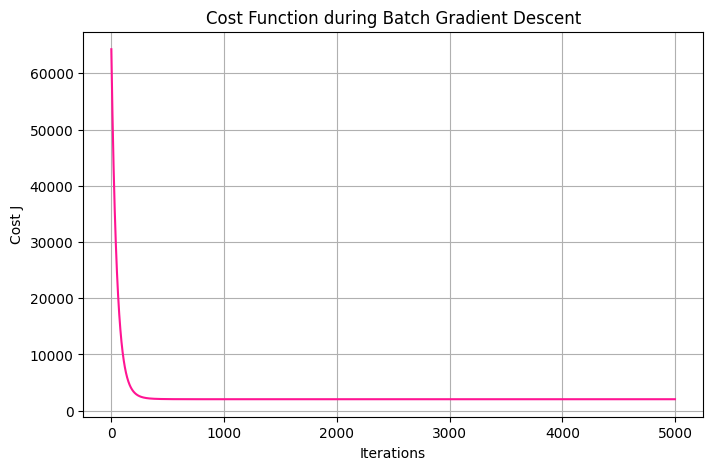

In [28]:
# Graficar el historial del costo durante el entrenamiento
plt.figure(figsize=(8, 5))
plt.plot(history_batch, color='deeppink')
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function during Batch Gradient Descent")
plt.grid(True)
plt.show()

### 5. Gradient descent (stochastic)

In [29]:
"""
Stochastic GD is the extreme case: it uses exactly 1 sample per update. 
"""

def stochastic_gradient_descent(X, y, alpha=0.01, n_iter=5000, random_state=42):
    """
    Implementa Stochastic Gradient Descent (SGD) para regresión lineal.
    En cada iteración usa UN solo ejemplo aleatorio del dataset.

    Args:
        X            : Matriz de features con bias (n x p)
        y            : Vector objetivo (n x 1)
        alpha        : Tasa de aprendizaje
        n_iter       : Número de iteraciones
        random_state : Semilla para reproducibilidad
    Returns:
        theta        : Parámetros encontrados (p x 1)
        history      : Historial del costo J (calculado sobre todo el dataset)
    """
    np.random.seed(random_state)         # Fijar semilla para reproducibilidad
    m, p = X.shape                       # m = muestras, p = parámetros
    theta = np.zeros((p, 1))             # Inicializar θ en ceros

    history = []                         # Historial del costo global

    for i in range(n_iter):
        # Seleccionar UN índice aleatorio del dataset
        idx = np.random.randint(0, m)

        # Extraer el único ejemplo (como vectores fila/columna)
        xi = X[idx, :].reshape(1, -1)    # (1 x p)
        yi = y[idx].reshape(1, -1)       # (1 x 1)

        # Gradiente basado en un solo ejemplo
        residual = xi @ theta - yi       # (1 x 1)
        gradient = xi.T * residual       # (p x 1)

        # Actualizar θ
        theta = theta - alpha * gradient

        # Registrar el costo GLOBAL (sobre todos los datos) para comparar
        history.append(cost_function(X, y, theta))

    return theta, history


# Ejecutar SGD
theta_sgd, history_sgd = stochastic_gradient_descent(X, y, alpha=0.01, n_iter=5000)

print("Parámetros (SGD):")
print(f"  θ₀ (bias):  {theta_sgd[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_sgd[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_sgd[2][0]:.4f}")

mse_sgd = mean_squared_error(y, X @ theta_sgd)
print(f"MSE (SGD): {mse_sgd:.4f}")

Parámetros (SGD):
  θ₀ (bias):  334.6694
  θ₁ (size):  108.6563
  θ₂ (rooms): 0.0161
MSE (SGD): 4157.8127


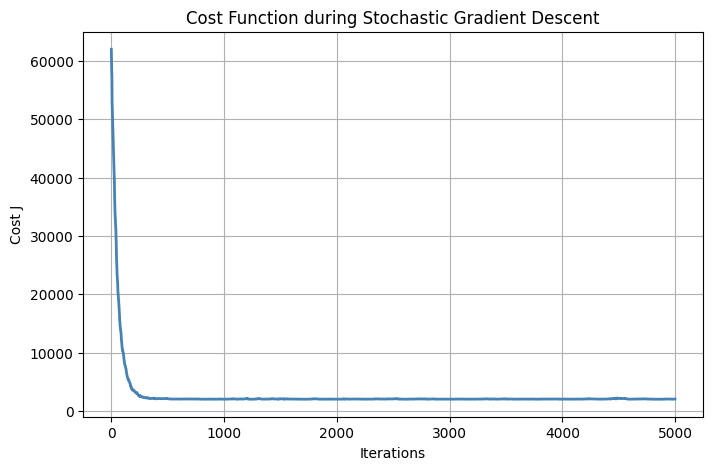

In [30]:
# Graficar el historial del costo durante el entrenamiento (SGD)
plt.figure(figsize=(8, 5))
plt.plot(history_sgd, color='steelblue', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function during Stochastic Gradient Descent")
plt.grid(True)
plt.show()

### 6. Gradient descent (mini-batch)

Explicación: 

In [31]:
"""
Mini-Batch GD is the balance between Batch and SGD: uses a small subset per update.
"""

def minibatch_gradient_descent(X, y, alpha=0.01, n_iter=5000, batch_size=8, random_state=42):
    """
    Implementa Mini-Batch Gradient Descent para regresión lineal.
    En cada iteración usa un subconjunto de tamaño batch_size.
    
    Args:
        X            : Matriz de features con bias (n x p)
        y            : Vector objetivo (n x 1)
        alpha        : Tasa de aprendizaje
        n_iter       : Número de iteraciones
        batch_size   : Tamaño del mini-batch
        random_state : Semilla para reproducibilidad
    Returns:
        theta        : Parámetros encontrados (p x 1)
        history      : Historial del costo J
    """
    np.random.seed(random_state)            # Fijar semilla para reproducibilidad
    m, p = X.shape                          # m = muestras, p = parámetros
    theta = np.zeros((p, 1))                # Inicializar θ en ceros
    history = []                            # Historial del costo global

    for i in range(n_iter):
        # Seleccionar aleatoriamente 'batch_size' índices del dataset
        indices = np.random.choice(m, size=batch_size, replace=False)  # Sin reemplazo

        # Extraer el mini-batch de features y etiquetas
        X_batch = X[indices, :]             # Sub-matriz de features (batch_size x p)
        y_batch = y[indices]                # Sub-vector objetivo (batch_size x 1)

        # Calcular el gradiente promediado sobre el mini-batch
        residuals = X_batch @ theta - y_batch           # Residuales del mini-batch
        gradient  = (1 / batch_size) * X_batch.T @ residuals  # Gradiente (p x 1)

        theta = theta - alpha * gradient    # Actualización de θ
        history.append(cost_function(X, y, theta))  # Registrar costo global

    return theta, history


# Ejecutar Mini-Batch GD con batch_size=8 (aprox. 1/5 del dataset)
theta_mb, history_mb = minibatch_gradient_descent(X, y, alpha=0.01, n_iter=5000, batch_size=8)

print("Parámetros (Mini-Batch GD, batch=8):")
print(f"  θ₀ (bias):  {theta_mb[0][0]:.4f}")
print(f"  θ₁ (size):  {theta_mb[1][0]:.4f}")
print(f"  θ₂ (rooms): {theta_mb[2][0]:.4f}")

mse_mb = mean_squared_error(y, X @ theta_mb)
print(f"MSE (Mini-Batch GD): {mse_mb:.4f}")

Parámetros (Mini-Batch GD, batch=8):
  θ₀ (bias):  340.7819
  θ₁ (size):  108.9355
  θ₂ (rooms): -4.5832
MSE (Mini-Batch GD): 4089.7949


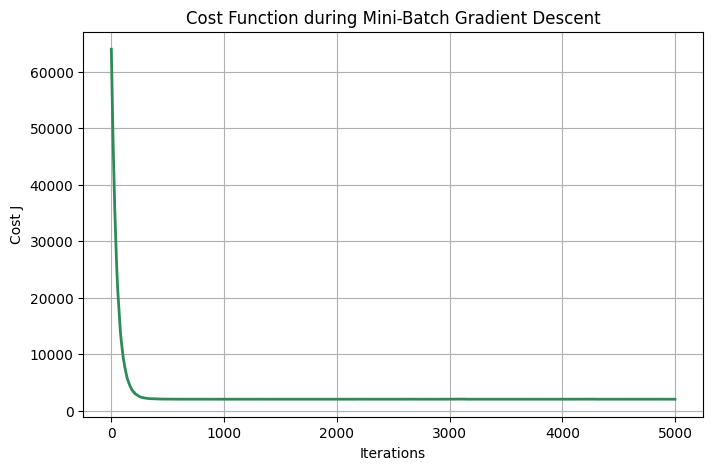

In [32]:
# Graficar el historial del costo durante el entrenamiento (Mini-Batch GD)
plt.figure(figsize=(8, 5))
plt.plot(history_mb, color='seagreen', linewidth=2)  # Menos ruido que SGD, más que Batch
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost Function during Mini-Batch Gradient Descent")
plt.grid(True)
plt.show()

---
## 7. Comparación de los tres métodos de descenso por gradiente (curvas de costo)

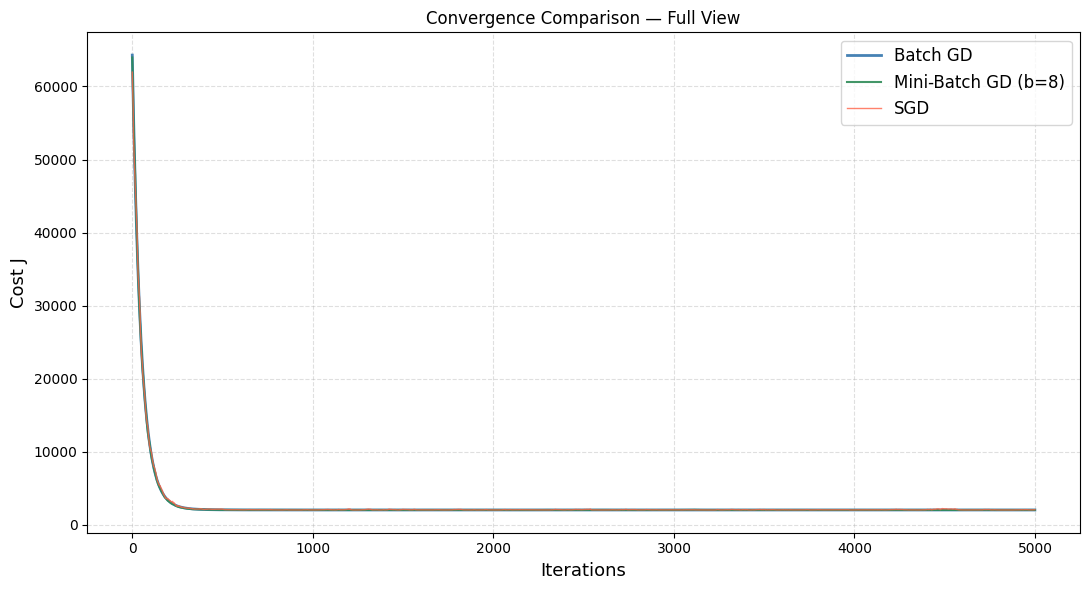

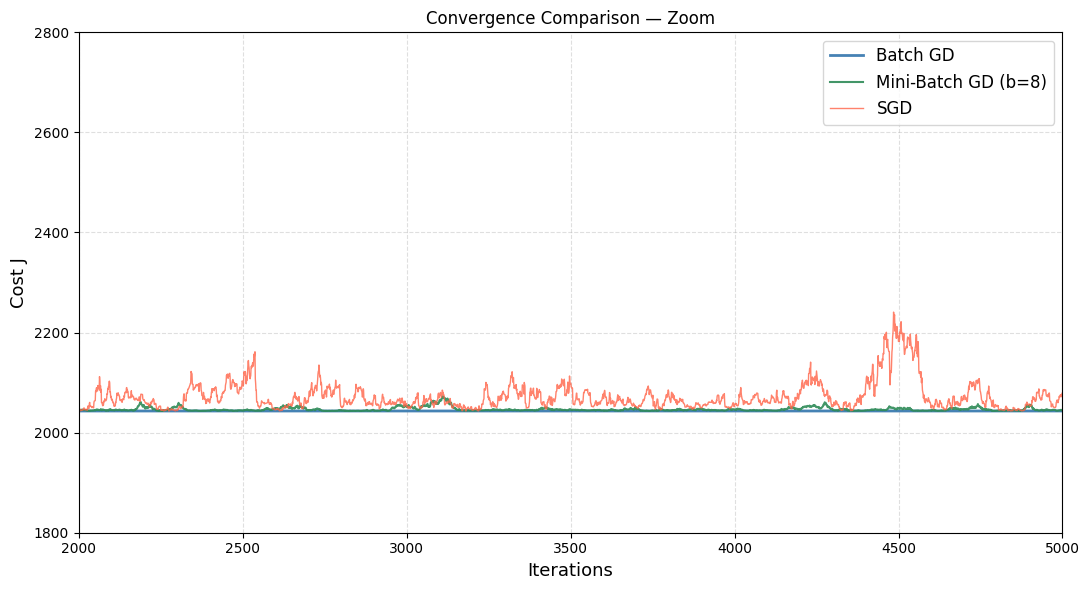

In [33]:
# Gráfica 1: Vista completa
plt.figure(figsize=(11, 6))
plt.plot(history_batch, label='Batch GD',            color='steelblue', linewidth=2)
plt.plot(history_mb,    label='Mini-Batch GD (b=8)', color='seagreen',  linewidth=1.5, alpha=0.9)
plt.plot(history_sgd,   label='SGD',                 color='tomato',    linewidth=1,   alpha=0.8)
plt.xlabel("Iterations", fontsize=13)
plt.ylabel("Cost J", fontsize=13)
plt.title("Convergence Comparison — Full View")
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Gráfica 2: Zoom donde se ven las diferencias
plt.figure(figsize=(11, 6))
plt.plot(history_batch, label='Batch GD',            color='steelblue', linewidth=2)
plt.plot(history_mb,    label='Mini-Batch GD (b=8)', color='seagreen',  linewidth=1.5, alpha=0.9)
plt.plot(history_sgd,   label='SGD',                 color='tomato',    linewidth=1,   alpha=0.8)
plt.xlim(2000, 5000)
plt.ylim(1800, 2800)
plt.xlabel("Iterations", fontsize=13)
plt.ylabel("Cost J", fontsize=13)
plt.title("Convergence Comparison — Zoom")
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

---
## 8. Comparación de Parámetros obtenidos con todos los métodos

In [56]:
# ====== Tabla 1: Métodos analíticos (datos sin normalizar) ======
results_raw = pd.DataFrame({
    'Method': ['Scikit-learn', 'Normal Equation', 'SVD Pseudoinverse'],
    'θ₀ (bias)': [theta_sklearn[0][0], theta[0][0], theta_pinv[0][0]],
    'θ₁ (size)': [theta_sklearn[1][0], theta[1][0], theta_pinv[1][0]],
    'θ₂ (rooms)': [theta_sklearn[2][0], theta[2][0], theta_pinv[2][0]],
    'MSE': [
        mean_squared_error(y_data, X_raw @ theta_sklearn),
        mean_squared_error(y_data, X_raw @ theta),
        mean_squared_error(y_data, X_raw @ theta_pinv)
    ]
})
results_raw = results_raw.set_index('Method').round(4)
print("Métodos Analíticos (sin normalizar):")
display(results_raw)

# ====== Tabla 2: Gradient Descent (datos normalizados) ======
results_gd = pd.DataFrame({
    'Method': ['Batch GD', 'SGD', 'Mini-Batch GD'],
    'θ₀ (bias)': [theta_gd[0][0], theta_sgd[0][0], theta_mb[0][0]],
    'θ₁ (size)': [theta_gd[1][0], theta_sgd[1][0], theta_mb[1][0]],
    'θ₂ (rooms)': [theta_gd[2][0], theta_sgd[2][0], theta_mb[2][0]],
    'MSE': [
        mean_squared_error(y, X @ theta_gd),
        mean_squared_error(y, X @ theta_sgd),
        mean_squared_error(y, X @ theta_mb)
    ]
})
results_gd = results_gd.set_index('Method').round(4)
print("\nGradient Descent (normalizado):")
display(results_gd)

Métodos Analíticos (sin normalizar):


,θ₀ (bias),θ₁ (size),θ₂ (rooms),MSE
Method,,,,
Scikit-learn,89597.9095,139.2107,-8738.0191,4.086560e+09
Normal Equation,89597.9095,139.2107,-8738.0191,4.086560e+09
SVD Pseudoinverse,89597.9095,139.2107,-8738.0191,4.086560e+09



Gradient Descent (normalizado):


,θ₀ (bias),θ₁ (size),θ₂ (rooms),MSE
Method,,,,
Batch GD,340.4127,109.4478,-6.5784,4086.5601
SGD,334.6694,108.6563,0.0161,4157.8127
Mini-Batch GD,340.7819,108.9355,-4.5832,4089.7949


## Conclusions

### 1) Sobre la normalización
**Scikit-learn, Ecuación Normal y SVD:** No es necesaria la normalización porque resuelve el sistema de ecuaciones con álgebra lineal. La escala de los datos no afecta al resultado final sino que simplemente modifica el valor de los coeficientes.

**Batch GD, SGD y Mini-Batch GD:** requieren normalización para su convergencia. Sin normalizar, las features presentan escalas bastante diferentes (size ~2000, rooms ~3), provocando que el gradiente zigzaguee y converja bastante lento, o que no converja.

### 2) Sobre los parámetros obtenidos

**Métodos analíticos (sin normalizar)**

Los tres métodos producen parámetros idénticos porque todos resuelven la misma ecuación: θ = (XᵀX)⁻¹Xᵀy, solo por caminos diferentes. Sus valores tienen interpretación directa:

| Parámetro | Valor | Interpretación |
|-----------|-------|----------------|
| θ₀ | ≈ 89,598 | Precio base (intercepto matemático) |
| θ₁ | ≈ 139 | Cada pie² adicional aumenta el precio ~$139 |
| θ₂ | ≈ -8,738 | Cada cuarto adicional reduce el precio ~$8,738* |

*Negativo porque a igual tamaño, más cuartos significa cuartos más pequeños.

**Métodos Gradient Descent (normalizados)**

Los parámetros están en escala normalizada, por lo que no son directamente comparables con los analíticos ni interpretables en dólares.

**¿Por qué el MSE es diferente?**

| Método | MSE | Escala |
|--------|-----|--------|
| Analítico | ~4.09 × 10⁹ | dólares² |
| Normalizado | ~4,086 | miles de dólares² |

Misma precisión, diferente escala: (1000)² = 10⁶


### 3) Sobre la convergencia

- **Batch GD:** 
  - Usa TODOS los 47 ejemplos para calcular el gradiente en cada iteración.
  - Convergencia suave y estable: la curva de J desciende de forma continua sin saltos.
  - Desventaja: cada iteración es costosa porque procesa todo el dataset.
  - Ideal cuando: el dataset es pequeño y cabe en memoria.

- **Mini-Batch GD (batch_size=8):** 
  - Usa subconjuntos de 8 ejemplos aleatorios por iteración.
  - Balance entre velocidad y estabilidad: converge más rápido que Batch GD 
    pero con pequeñas oscilaciones en la curva de J.
  - El ruido actúa como regularización implícita, ayudando a escapar de mínimos locales.
  - Ideal cuando: el dataset es grande y se necesita balance entre velocidad y precisión.

- **SGD (Stochastic Gradient Descent):** 
  - Usa UN SOLO ejemplo aleatorio por iteración.
  - Convergencia muy rápida en términos de iteraciones, pero con alta oscilación/ruido.
  - La curva de J zigzaguea mucho porque cada ejemplo individual puede tener 
    un gradiente muy diferente al gradiente promedio real.
  - Nunca converge exactamente al mínimo, sino que oscila alrededor de él.
  - Ideal cuando: el dataset es muy grande (millones de ejemplos) y se necesita 
    velocidad sobre precisión.
  - En este caso, SGD no convergió completamente: θ₂ (rooms) ≈ 0.016, 
  lo que indica que el modelo no logró capturar correctamente el efecto del 
  número de cuartos en el precio. Esto se refleja en su MSE ligeramente mayor 
  (4157 vs 4086 de Batch GD), lo cual es esperado con un learning rate fijo 
  de α=0.01 y solo 5000 iteraciones: SGD oscila alrededor del mínimo pero 
  no se asienta en él.

